## Exploring Titanic Passenger Demographics and Survival Factors
### Dataset Description:
The Titanic dataset is a commonly used dataset in data science and machine learning projects. It contains information about the passengers on the Titanic, including their demographics, ticket details, and survival status. 
### The dataset columns are described below:
##### PassengerId: A unique identifier for each passenger.
##### Survived: Indicates whether the passenger survived (1) or not (0).
##### Pclass: Passenger class (1 = 1st, 2 = 2nd, 3 = 3rd).
##### Name: The full name of the passenger.
##### Sex: Gender of the passenger (male/female).
##### Age: Age of the passenger in years. Some entries contain NaN values where the age is not available.
##### SibSp: Number of siblings or spouses aboard the Titanic.
##### Parch: Number of parents or children aboard the Titanic.
##### Ticket: Ticket number of the passenger.
##### Fare: The fare paid by the passenger for the ticket.
##### Cabin: Cabin number where the passenger stayed. This column has many missing values.
##### Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).
### The code performs the following steps:

Loads the dataset and displays initial information.

Cleans the data by filling missing values for Age and Embarked, and dropping the Cabin column.

Sets up the visual style using Seaborn.

Creates various visualizations to explore the distribution of passenger gender, age, class, and survival status.

Examines survival rates by gender and class.

Uses a pairplot to investigate relationships between Survived, Pclass, Age, and Fare.

These visualizations help to understand the key patterns and relationships in the Titanic dataset, providing a foundation for further analysis and modeling.= Southampton).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
df = pd.read_csv('Titanic-Dataset.csv')

# Display the first few rows of the dataset
display(df.head())


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:

# Display basic information about the dataset
display(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


None

In [4]:
# Display summary statistics
display(df.describe())


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:

# Check for missing values
display(df.isnull().sum())



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Handling missing values
# For simplicity, we can fill missing 'Age' with the median age and 'Embarked' with the most common port
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [7]:

# 'Cabin' has too many missing values, so we can drop this column for now
df.drop(columns=['Cabin'], inplace=True)


In [8]:

# Display the cleaned data info
display(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


None

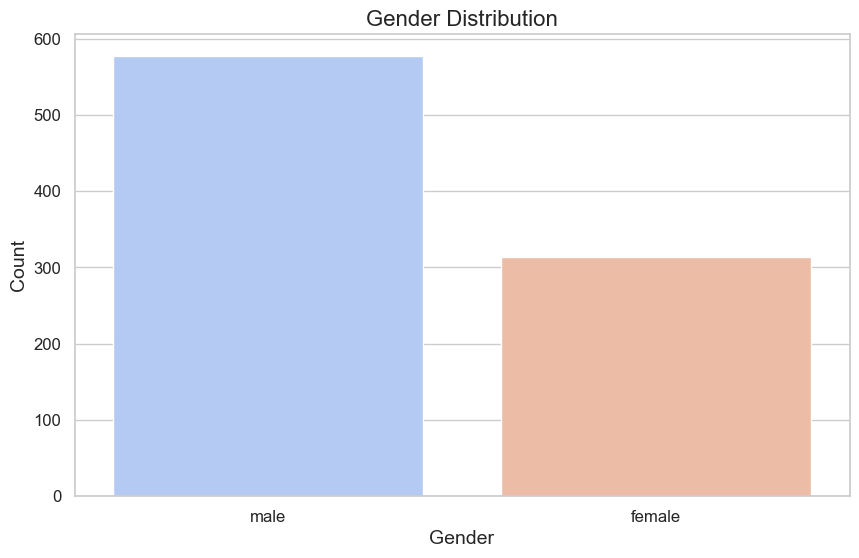

In [13]:

# Set the style and palette
sns.set(style='whitegrid', palette='muted')

# Countplot for gender distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', data=df, palette='coolwarm')
plt.title('Gender Distribution', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


C:\Users\ziadk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


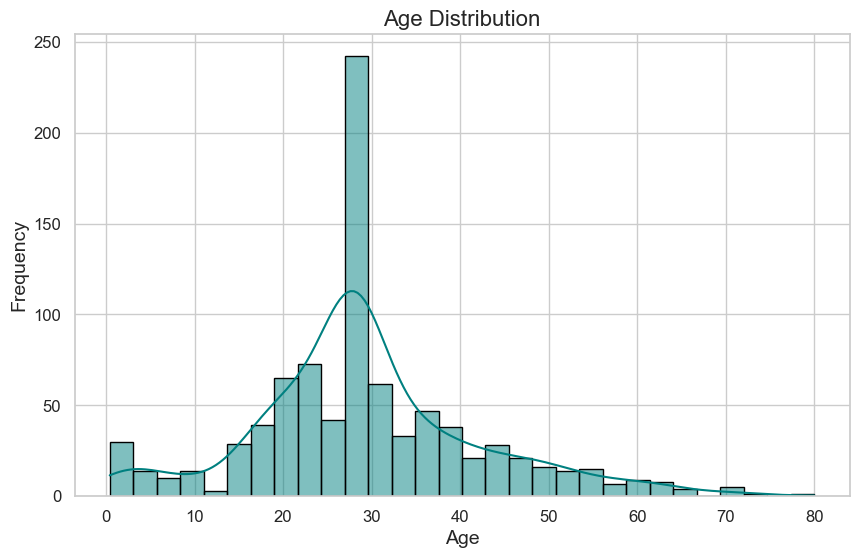

In [14]:

# Histogram for age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='teal', edgecolor='black')
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


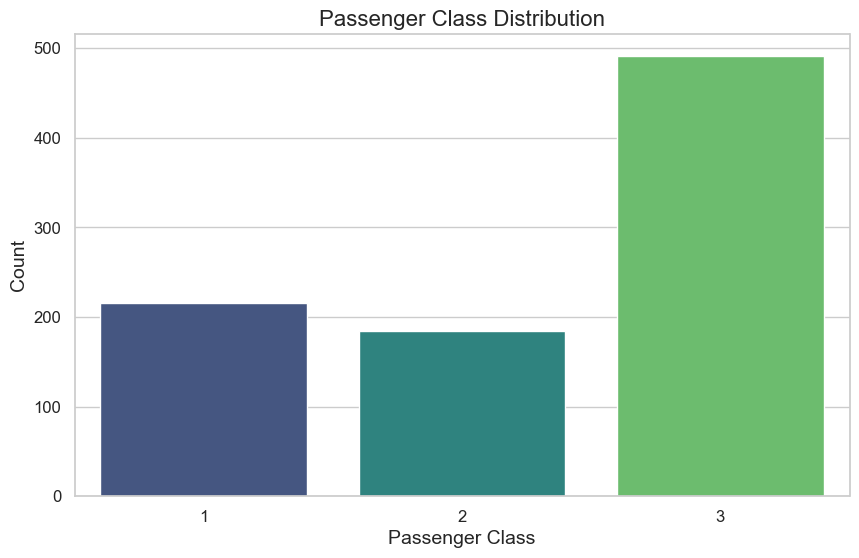

In [15]:

# Countplot for Pclass distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', data=df, palette='viridis')
plt.title('Passenger Class Distribution', fontsize=16)
plt.xlabel('Passenger Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


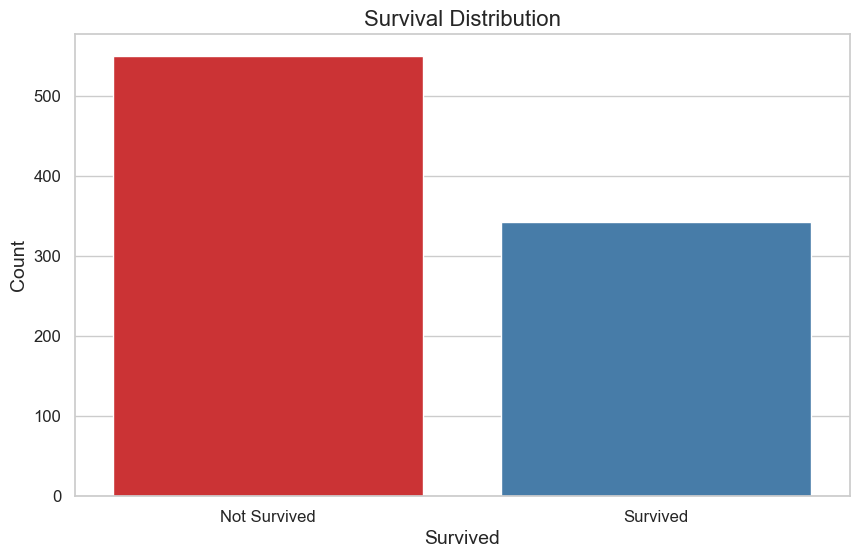

In [16]:

# Countplot for survival distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', data=df, palette='Set1')
plt.title('Survival Distribution', fontsize=16)
plt.xlabel('Survived', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12, ticks=[0, 1], labels=['Not Survived', 'Survived'])
plt.yticks(fontsize=12)
plt.show()


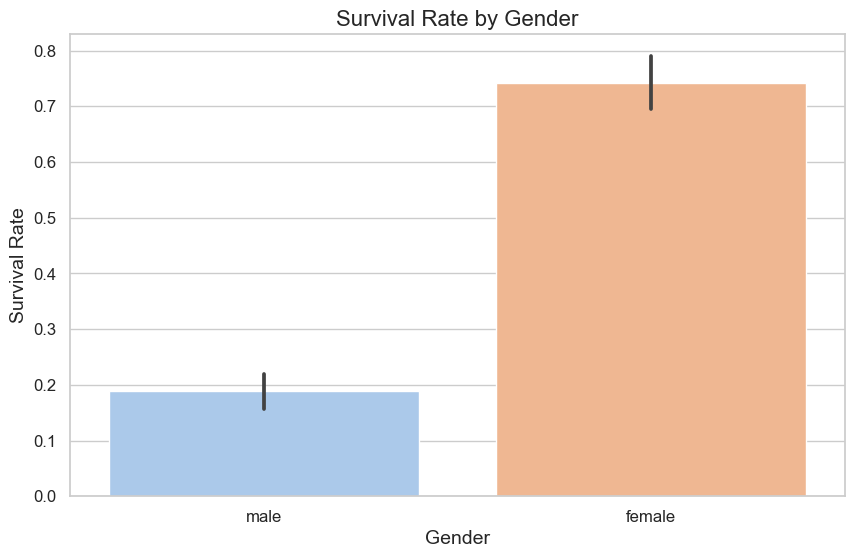

In [18]:

# Survival rate by gender
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', data=df, palette='pastel')
plt.title('Survival Rate by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Survival Rate', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


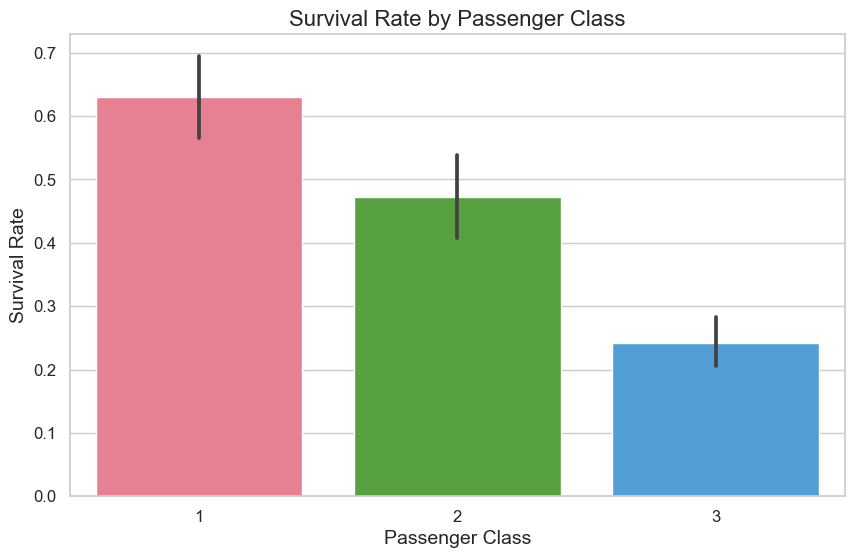

In [19]:

# Survival rate by Pclass
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=df, palette='husl')
plt.title('Survival Rate by Passenger Class', fontsize=16)
plt.xlabel('Passenger Class', fontsize=14)
plt.ylabel('Survival Rate', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


C:\Users\ziadk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ziadk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ziadk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1200x1000 with 0 Axes>

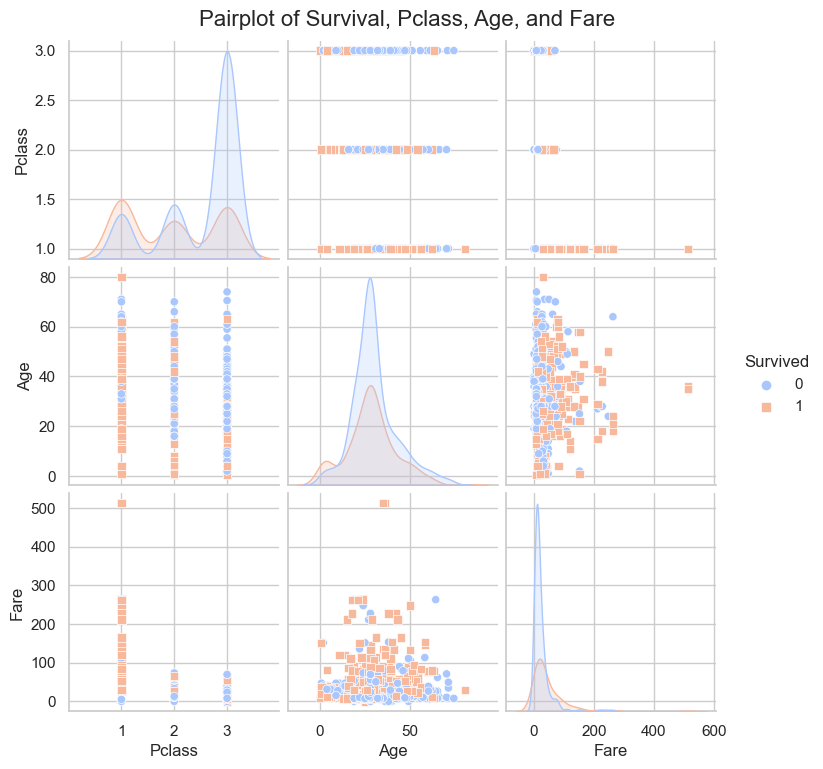

In [20]:

# Pairplot to see relationships between features
plt.figure(figsize=(12, 10))
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Fare']], hue='Survived', palette='coolwarm', markers=["o", "s"])
plt.suptitle('Pairplot of Survival, Pclass, Age, and Fare', fontsize=16, y=1.02)
plt.show()
